# Curneu Problem Statement - 2

### Nikinprasad V R
### 1832038

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
#--DATASET DECRIPTION--#
data=pd.read_csv("D:\#PROJECTS\Curneu\SD03Q016\Diabetes Database.csv")
print('\n')
print("Description of the dataset")
print(data.describe())
print(data.info())
print(data.isnull().sum())
print('\n')
print("Finding the Square Root of number of obervations in the dataset") #Thumb rule
print(data.shape)
print("sqrt", np.sqrt(769))



Description of the dataset
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min   

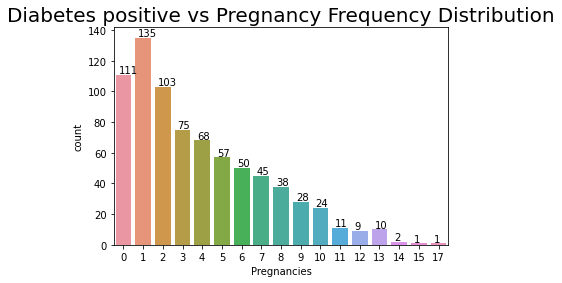

In [12]:
#--EDA--#
ax = sns.countplot(data=data, x ='Pregnancies')
ax.set_title('Diabetes positive vs Pregnancy Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

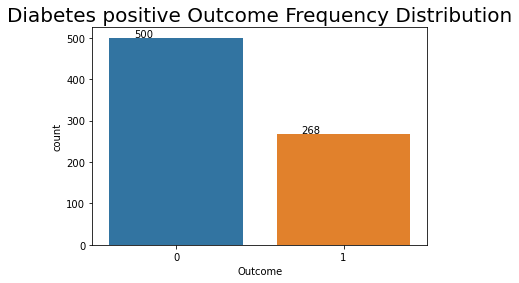

In [13]:
ax = sns.countplot(data=data, x ='Outcome')
ax.set_title('Diabetes positive Outcome Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

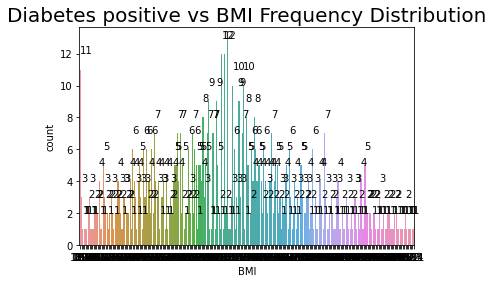

In [14]:
ax = sns.countplot(data=data, x ='BMI')
ax.set_title('Diabetes positive vs BMI Frequency Distribution', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [15]:
#--SPLITTING THE DATASET--#
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.1, random_state=0)

In [16]:
#--SCALLING--#
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
X_train = pd.DataFrame(x_train)

In [17]:
#--FITTING THE MODEL--#
knn= KNeighborsClassifier(n_neighbors=27) # The Neighbor is choosen based on Thumb rule
knn.fit(x_train,y_train)
y_test_pred=knn.predict(x_test)
y_test_values=y_test
print("Accuracy of the model is :", knn.score(x_test,y_test)*100)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
classification = classification_report(y_test,y_pred)
print("CALSSIFICATION REPORT OF KNN \n",classification)
print('\n')

Accuracy of the model is : 84.4155844155844
[[47  4]
 [ 8 18]]
CALSSIFICATION REPORT OF KNN 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.82      0.69      0.75        26

    accuracy                           0.84        77
   macro avg       0.84      0.81      0.82        77
weighted avg       0.84      0.84      0.84        77





In [18]:
#--PREDICTING THE VALUES--#
print("PREDICTING VALUES")
y_predict=pd.DataFrame(data=[y_test_pred,y_test_values])
print(knn.predict([[6,148,72,35,0,33,1,50]]))


PREDICTING VALUES
[1]
